# Treinamento e inferência YOLO_v2
Para a criação da yolo vamos utilizaar e modificar um repositório publico com a implementação da yolo_v2 em keras:
* https://github.com/rodrigo2019/keras_yolo2

### Conjunto de dados
Para treinarmos a YOLO é necessário que nosso conjunto de dados possua as coordenadas do bounding box do objeto. Para criarmos esse conjunto de dados iremos alterar os dados gerados no treinamento de Regressão e transformar as coordenadas x, y em xmin, ymin, xmax, ymax.
A biblioteca da Yolo nos permite carregar os dados de mais de uma maneira, com XML ou CSV, por praticidade iremos utilizar o CSV que funciona da seguinte maneira:

`fname, xmin, ymin, xmax, ymax, label`

caso haja anotações com o mesmo fname, ou seja, mais de uma anotação na imagem, as anotações serão agregadas para a mesma imagem.

In [3]:
import cv2
from matplotlib import pyplot as plt

In [4]:
files = ["ann_train", "ann_val"]
for f in files:
    with open(f"{f}.txt") as ann, open(f"{f}_bbox.txt", "w") as new_ann:
        for line in ann:
            fname, x, y, label = line.strip().split(",")
            image = cv2.imread(fname)
            x = int(x)
            y = int(y)
            # Criação do bbox com tamanho 40x40 utilizando como centro as coordenadas x,y
            xmin = max(x - 20, 0)
            xmax = min(x + 20, image.shape[1] - 1)
            ymin = max(y - 20, 0)
            ymax = min(y + 20, image.shape[0] - 1)
            new_ann.write(f"{fname},{xmin},{ymin},{xmax},{ymax},{label}\n")


##### Visualização do novo conjunto de dados

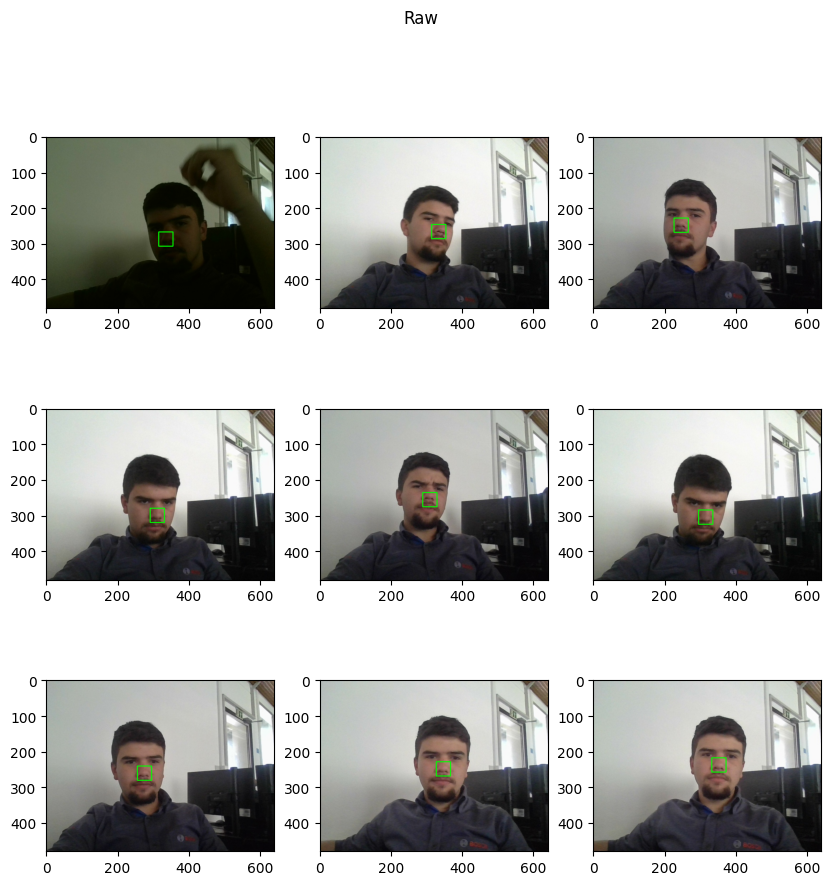

In [5]:
plt.figure(figsize=(10, 10))
with open("ann_val_bbox.txt") as ann:
    for i, line in enumerate(ann):
        if i == 9:
            break
        plt.subplot(3, 3, i + 1)
        fname, xmin, ymin, xmax, ymax, label = line.strip().split(",")
        xmin = int(xmin)
        xmax = int(xmax)
        ymin = int(ymin)
        ymax = int(ymax)
        image = cv2.imread(fname)

        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.suptitle('Raw')
    plt.show()


### Treinamento

In [6]:
%run .\keras_yolo2\train.py -c .\keras_yolo2\config.json

Exception: File `'.\\keras_yolo2\\train.py'` not found.

### Inferência

In [ ]:
from keras_yolov2.frontend import YOLO
import json

In [ ]:
with open("keras_yolo2/config.json") as f:
    config = json.loads(f.read())

yolo = YOLO(backend=config['model']['backend'],
            input_size=(config['model']['input_size_h'], config['model']['input_size_w']),
            labels=config['model']['labels'],
            anchors=config['model']['anchors'],
            gray_mode=config['model']['gray_mode'])
yolo.load_weights(r"./yolo_backup\yolo_nose_20210413095549\yolo_nose_20210413095549_bestMap.h5")

In [ ]:
plt.figure(figsize=(10, 10))
with open("ann_val_bbox.txt") as ann:
    for i, line in enumerate(ann):
        if i == 9:
            break
        plt.subplot(3, 3, i + 1)
        fname, _, _, _, _, label = line.strip().split(",")
        image = cv2.imread(fname)
        bboxs = yolo.predict(image)
        for bbox in bboxs:
            xmin = int(bbox.xmin * image.shape[1])
            xmax = int(bbox.xmax * image.shape[1])
            ymin = int(bbox.ymin * image.shape[0])
            ymax = int(bbox.ymax * image.shape[0])
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.suptitle('Raw')
    plt.show()